<a href="https://colab.research.google.com/github/Omotoso526/-NLP-PROJECTS/blob/main/SPAM_CLASSIFICATIONipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SPAM CLASSIFICATION USING NLP**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("spam.tsv", sep = '\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [3]:
df.isnull().sum()

,0
label,0
message,0
length,0
punct,0


In [4]:
df.shape

(5572, 4)

In [5]:
df['label'].value_counts()

,count
label,
ham,4825
spam,747


This is a highly skewed data which may be bad for classification problems. Therefore, we need to balance the data for good accuracy.

In [6]:
#Balance the data
ham = df[df['label'] == 'ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [7]:
spam = df[df['label'] == 'spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [8]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [9]:
ham = ham.sample(spam.shape[0])

In [10]:
ham.shape

(747, 4)

In [15]:
data = pd.concat([ham, spam], ignore_index=True)
data.tail()

,label,message,length,punct
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3
1493,spam,This is the 2nd time we have tried 2 contact u...,160,8


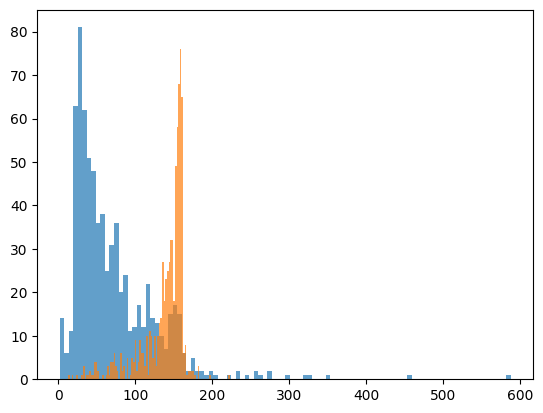

In [18]:
###Exploratory Data Analysis
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()


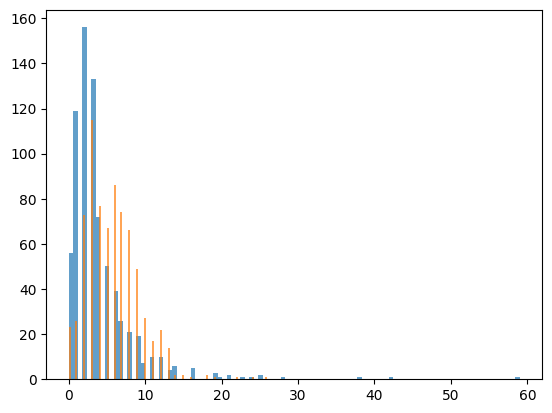

In [19]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()


**Data Preprocesssing**

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
X_train, x_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3,
                                                    random_state = 42, shuffle = True)

In [29]:
#bag of words representation
vectorizer = TfidfVectorizer()


In [30]:
x_train = vectorizer.fit_transform(X_train)
x_train.shape

(1045, 3701)

**Pipeline and RF**

In [32]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators = 100, n_jobs = -1))])
clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [33]:
y_pred = clf.predict(x_test)

In [34]:
confusion_matrix(y_test, y_pred)

array([[216,   1],
       [ 24, 208]])

In [35]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n         ham       0.90      1.00      0.95       217\n        spam       1.00      0.90      0.94       232\n\n    accuracy                           0.94       449\n   macro avg       0.95      0.95      0.94       449\nweighted avg       0.95      0.94      0.94       449\n'

In [36]:
accuracy_score(y_test, y_pred)

0.9443207126948775

In [38]:
clf.predict(["get out of here"])

array(['ham'], dtype=object)

In [42]:
clf.predict(["You just made a jackpot"])

array(['ham'], dtype=object)